In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/jholmes/Desktop/NCAR/gVOD_data.csv'
df = pd.read_csv(file_path, low_memory=False)
df.head()

,No,Ocean,Station,Latitude,Longitude,Depth water [m],Elevation [m a.s.l.],Month (Sampling month),Day,Years (Year of sampling),...,DIN [¬µmol/l],[NH4]+ [¬µmol/l],[NO2]- [¬µmol/l],[NO3]- [¬µmol/l],[NO3]- + [NO2]- [¬µmol/l],SiO3-Si [¬µmol/l],[PO4]3- [¬µmol/l],"Ocean (Ocean mask : 1: Atlantic, 2: ...)",Reference,Comment
0,1,South China Sea,Y45,16.17,114.70,1.0,NaN,8.0,10.0,2007.0,...,NaN,NaN,NaN,NaN,NaN,2.40,NaN,2,"Chen, X., et al. (2011), Viral dynamics in the...",bacterial carbon:1.1e-8 ug C cell-1
1,2,South China Sea,YS12,14.73,113.47,1.0,NaN,8.0,NaN,2007.0,...,NaN,NaN,NaN,NaN,NaN,2.44,NaN,2,"Chen, X., et al. (2011), Viral dynamics in the...",bacterial carbon:1.1e-8 ug C cell-1
2,3,South China Sea,Y60,14.43,110.65,1.0,NaN,8.0,NaN,2007.0,...,NaN,NaN,NaN,NaN,NaN,2.45,NaN,2,"Chen, X., et al. (2011), Viral dynamics in the...",bacterial carbon:1.1e-8 ug C cell-1
3,4,South China Sea,YS06,14.24,112.19,1.0,NaN,8.0,NaN,2007.0,...,NaN,NaN,NaN,NaN,NaN,2.23,NaN,2,"Chen, X., et al. (2011), Viral dynamics in the...",bacterial carbon:1.1e-8 ug C cell-1
4,5,South China Sea,TS-1,14.18,113.69,1.0,NaN,8.0,NaN,2007.0,...,NaN,NaN,NaN,NaN,NaN,2.20,NaN,2,"Chen, X., et al. (2011), Viral dynamics in the...",bacterial carbon:1.1e-8 ug C cell-1


In [3]:
# Parameters available
df.columns

Index(['No', 'Ocean', 'Station', 'Latitude', 'Longitude', 'Depth water [m]',
       'Elevation [m a.s.l.]', 'Month (Sampling month)', 'Day',
       'Years (Year of sampling)', 'Date/Time', 'Virus [#/ml] (Particles/ml)',
       'Virus std dev [¬±]', 'Virus HDNA [#/ml]', 'Virus LDNA [#/ml]',
       'Method (For virus abundance counted b...)',
       'Virus prod [#/ml/h] (Lytic viral production)',
       'Virus prod [%/h] (Lytic viral production)',
       'Method (For lytic virus production: 1...)',
       'Virus prod [#/ml/h] (Lysogenic viral production)',
       'Method (For lysogenic virus productio...)',
       'Virus decay [#/ml/h] (Unit:VLP/ml/h)', 'Virus decay [%/h]',
       'Virus/Prokar', 'Virus/Prokar std dev [¬±]', 'Burst size [#]',
       'Bacterial mortality [#/ml/h]', 'Cells lysed [%/h]',
       'Lytic infection freq [%]', 'Method (For frequency of lytic infect...)',
       'Lysogenic infection freq [%]',
       'Method (For frequency of lysogenic in...)', 'Tt [h]',
       '

In [4]:
# How many individual references?
len(set(df['Reference']))

103

In [14]:
# Liturature reporting burst sizes
set(df.dropna(subset=['Burst size [#]'])['Reference'])

{'Bettarel, Y., et al. (2008), Virioplankton distribution and activity in a tropical eutrophicated bay, Estuarine, Coastal and Shelf Science, doi:10.1016/j.ecss.2008.08.018',
 'Bongiorni, L., et al. (2005), Viral production, decay rates, and life strategies along a trophic gradient in the north Adriatic Sea, Applied and Environmental Microbiology, doi:10.1128/AEM.71.11.6644-6650.2005',
 'Bouvy, M., et al. (2012), Uncoupled viral and bacterial distributions in coral reef waters of Tuamotu Archipelago (French Polynesia), Mar Pollut Bull, doi:10.1016/j.marpolbul.2012.01.001',
 'Chen, X., et al. (2011), Viral dynamics in the surface water of the western South China Sea in summer 2007, Aquatic Microbial Ecology, doi:10.3354/ame01490',
 'Jasna, V., et al. (2017), Viral-induced mortality of prokaryotes in a tropical monsoonal estuary, Front Microbiol, doi:10.3389/fmicb.2017.00895',
 'Jasna, V., et al. (2018), Differential impact of lytic viruses on prokaryotic morphopopulations in a tropical 

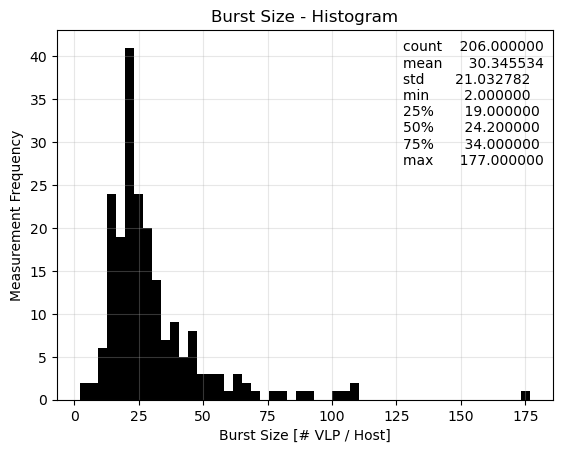

In [6]:
plt.hist(df['Burst size [#]'], bins=50, color='black');

plt.title('Burst Size - Histogram')
plt.xlabel('Burst Size [# VLP / Host]')
plt.ylabel('Measurement Frequency')

plt.figtext(0.665, 0.6, df['Burst size [#]'].describe().to_string())
plt.grid(alpha=.3)
plt.show()

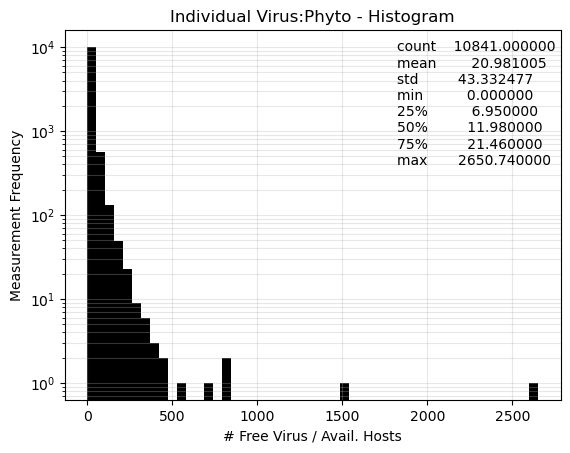

In [7]:
plt.hist(df['Virus/Prokar'], bins=50, color='black');

plt.title('Individual Virus:Phyto - Histogram')
plt.xlabel('# Free Virus / Avail. Hosts')
plt.ylabel('Measurement Frequency')

plt.figtext(0.645, 0.6, df['Virus/Prokar'].describe().to_string())
plt.yscale('log')
# plt.xscale('log')
plt.grid(which='both', alpha=.3)
plt.show()

In [15]:
viral_decay_perc_per_hour = df['Virus decay [%/h]'].dropna()

# References reporting viral decay rates
set(df.dropna(subset=['Virus decay [%/h]'])['Reference'])

{'Bongiorni, L., et al. (2005), Viral production, decay rates, and life strategies along a trophic gradient in the north Adriatic Sea, Applied and Environmental Microbiology, doi:10.1128/AEM.71.11.6644-6650.2005',
 'Chen, X., et al. (2011), Viral dynamics in the surface water of the western South China Sea in summer 2007, Aquatic Microbial Ecology, doi:10.3354/ame01490',
 'Chen, X., et al. (2019), Tide driven microbial dynamics through virus-host interactions in the estuarine ecosystem, Water Res, doi:10.1016/j.watres.2019.05.051',
 'Winter, C., et al. (2004), Diel cycles in viral infection of bacterioplankton in the North Sea, Aquatic Microbial Ecology, doi:10.3354/ame035207'}

We want to convert viral decay rates from units per hour to units per day. Let $P$ be equal to the proportion of loss per hour. Notice, using a simple exponential decay formula $y(t) = e^{-t / \tau}$, 

$$ (1 - P) = y(1) = e^{-1/\tau} \quad \Rightarrow \quad ln(1-P) = -1 / \tau \quad \Rightarrow \quad \tau = -1 / ln(1-P).$$

Plugging back into the exponential formula gives, 

$$ y(t) = e^{-t / \tau} = e^{t \cdot ln(1-P)} = (e^{ln(1-P)})^{t}) = (1-P)^t \textrm{ for t in hours.}$$

Thus, $y(24) = (1-P)^{24}$ gives the proportion *left over* after 1 day, and $1 - y(24) = 1 - (1-P)^{24}$ is the proportion lost over 1 day. 


Example: if $P = .3$ / hr, then conv_P (converted P) is equal to 

$$\text{conv_P} = 1 - (1 - .3)^{24} = 1 - (.7)^{24} \approx 1 - (0.0001915) \approx 0.9998 \text{ per day}.$$




In [9]:
viral_decay_rate_per_day = (1 - (1 - viral_decay_perc_per_hour/100) ** 24)

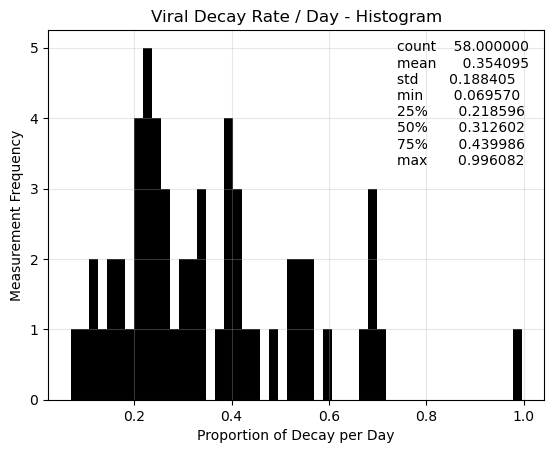

In [10]:
plt.hist(viral_decay_rate_per_day, bins=50, color='black');

plt.title('Viral Decay Rate / Day - Histogram')
plt.xlabel('Proportion of Decay per Day')
plt.ylabel('Measurement Frequency')

plt.figtext(0.67, 0.6, viral_decay_rate_per_day.describe().to_string())
plt.grid(which='both', alpha=.3)
plt.show()

In [11]:
# Similar conversion for lysis rate
lysis_perc_per_hour = df['Cells lysed [%/h]'][df['Cells lysed [%/h]'] != '#999.000000000'].dropna().astype(float)
lysis_perc_per_hour.describe()

count    61.000000
mean      1.626715
std       2.930575
min       0.001071
25%       0.009854
50%       0.351590
75%       1.297688
max      12.000000
Name: Cells lysed [%/h], dtype: float64

In [12]:
lysis_rate_per_day = (1 - (1 - lysis_perc_per_hour/100) ** 24)

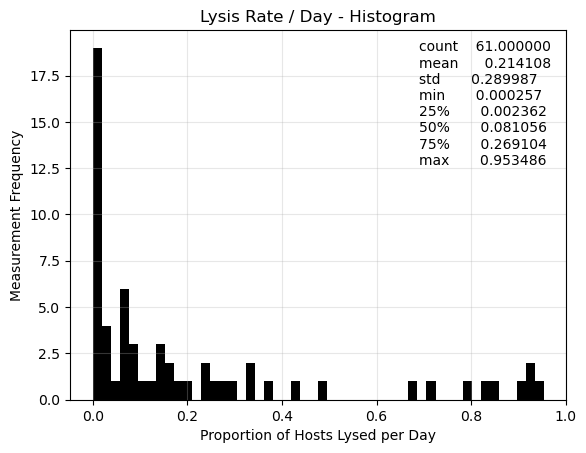

In [13]:
plt.hist(lysis_rate_per_day, bins=50, color='black');

plt.title('Lysis Rate / Day - Histogram')
plt.xlabel('Proportion of Hosts Lysed per Day')
plt.ylabel('Measurement Frequency')

plt.figtext(0.67, 0.6, lysis_rate_per_day.describe().to_string())
plt.grid(which='both', alpha=.3)
plt.show()